In [91]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_curve, auc

Memastikan dataset berhasil dimuat dengan benar dengan menampilkan beberapa baris pertama dari data.

In [93]:
dataset = pd.read_csv('K01_heart_disease.csv')
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Memahami struktur data serta mengidentifikasi kolom mana yang memiliki tipe data numerik dan kategorikal.

In [95]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Mencari fitur yang perlu dienkode ke dalam format numerik agar bisa diproses oleh model.

In [97]:
categorical_feature = [feature for feature in dataset.columns
                       if dataset [feature].dtypes == "O"]
dataset[categorical_feature]

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


Memahami kategori yang ada pada setiap fitur, yang akan membantu saat mengonversi kategori ini menjadi nilai numerik.

In [99]:
for i in categorical_feature:
    print(dataset[i].unique())

['M' 'F']
['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']


Mengubah fitur kategorikal menjadi bentuk yang dapat diterima oleh model machine learning.

In [101]:
label_encoder = LabelEncoder()

for feature in categorical_feature:
    print(dataset[feature].unique())
    dataset[feature] = label_encoder.fit_transform(dataset[feature])
    print(dataset[feature].unique())

['M' 'F']
[1 0]
['ATA' 'NAP' 'ASY' 'TA']
[1 2 0 3]
['Normal' 'ST' 'LVH']
[1 2 0]
['N' 'Y']
[0 1]
['Up' 'Flat' 'Down']
[2 1 0]


Menyiapkan data untuk proses pelatihan dengan memisahkan variabel independen dan variabel target.

In [103]:
X = data.drop(columns='HeartDisease')
y = data['HeartDisease']

Menggunakan data latih untuk melatih model dan data uji untuk mengevaluasi performa model.

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Membuat dan melatih model untuk memprediksi kemungkinan penyakit jantung.

In [107]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

Mendapatkan prediksi untuk evaluasi akurasi model pada data latih dan data uji.

In [109]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

Menilai kualitas model dalam melakukan prediksi pada data latih dan data uji.

In [111]:
from sklearn.metrics import confusion_matrix, classification_report
print('evaluasi training')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print('evaluasi testing')
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

evaluasi training
[[284  49]
 [ 51 350]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       333
           1       0.88      0.87      0.88       401

    accuracy                           0.86       734
   macro avg       0.86      0.86      0.86       734
weighted avg       0.86      0.86      0.86       734

evaluasi testing
[[65 12]
 [17 90]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        77
           1       0.88      0.84      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



Memberikan metrik evaluasi yang sederhana dan umum, yaitu akurasi model.

In [113]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [114]:
print(f'Akurasi: {accuracy * 100:.2f}%')

Akurasi: 84.24%


Memudahkan dalam memahami kesalahan dan keberhasilan prediksi model.

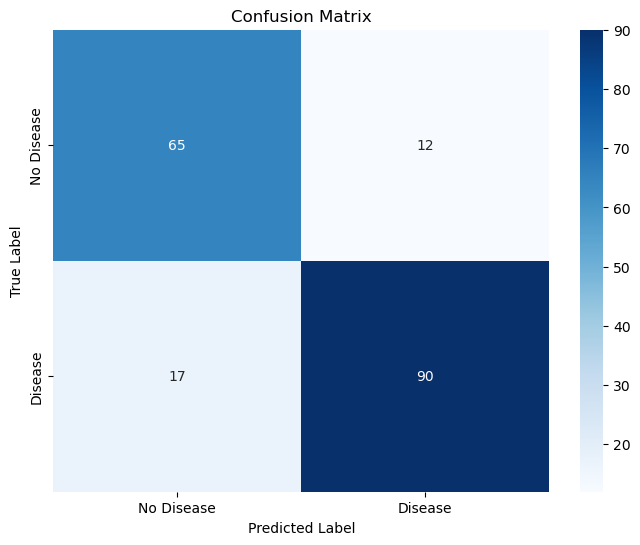

In [116]:
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Menyediakan informasi rinci mengenai metrik precision, recall, dan F1-score untuk setiap kelas, membantu dalam memahami performa model pada setiap kategori target.

In [75]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No Disease", "Disease"]))

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.79      0.84      0.82        77
     Disease       0.88      0.84      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

